In [94]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [95]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels = torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))

In [96]:
print(features[0], labels[0])

tensor([-0.5741,  1.1302], dtype=torch.float64) tensor(0.0131, dtype=torch.float64)


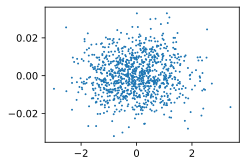

In [97]:
def use_svg_dispaly():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5,2.5)):
    use_svg_dispaly()
    plt.rcParams['figure.figsize']=figsize

set_figsize()
plt.scatter(features[:, 1].numpy(),labels.numpy(),1)

In [98]:
features[1,1].numpy()

array(-1.57417814)

In [99]:
len(features)
features.shape

torch.Size([1000, 2])

In [100]:
def data_iter(batch_size, features, labels):
    num_examples=len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j), labels.index_select(0,j)

In [101]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.6701,  0.1161],
        [ 0.4269,  0.1951],
        [ 0.3457, -0.3194],
        [ 0.3155, -0.2432],
        [ 0.4085, -0.8334],
        [ 1.9558,  0.2961],
        [ 0.6822,  1.6682],
        [ 0.7434, -1.1765],
        [ 0.1283, -2.0179],
        [-0.8943,  0.6479]], dtype=torch.float64) tensor([-0.0108,  0.0082,  0.0006, -0.0047, -0.0129, -0.0151, -0.0103, -0.0198,
        -0.0014,  0.0082], dtype=torch.float64)


In [102]:
#3.2.3初始化模型权重

In [103]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.double)
b = torch.zeros(1, dtype=torch.double)

In [104]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], dtype=torch.float64, requires_grad=True)

In [105]:
#定义模型

In [106]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [107]:
#3.2.5定义损失函数

In [108]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [109]:
#3.2.6定义优化算法

In [110]:
def sgd(params, lr, batch_size):
    for param in  params:
        param.data = lr * param.grad / batch_size

In [111]:
#3.2.7预训练模型

In [115]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.requires_grad_(requires_grad=True)
        l.backward()
        sgd([w, b],lr,batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item())) 

epoch 1, loss 0.000054
epoch 2, loss 0.000054
epoch 3, loss 0.000054


In [116]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[-1.3540e-05],
        [ 2.5642e-05]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([-3.3402e-05], dtype=torch.float64, requires_grad=True)
